# Waterfilling Levels

In [89]:
import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import food_bank_functions
import food_bank_bayesian
import matplotlib.pyplot as plt
import seaborn as sns
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)

<module 'food_bank_functions' from '../../functions\\food_bank_functions.py'>

### Plotting the distribution

In [106]:
vals = np.loadtxt('../../data/fbst_synthetic/vals.csv', delimiter=",")
support = np.loadtxt('../../data/fbst_synthetic/support.csv', delimiter=",")

In [107]:
print(vals)
print(support)

[[0.0000e+00 2.0000e-05 3.2000e-04 1.4500e-03 5.4300e-03 1.6810e-02
  4.0300e-02 8.4960e-02 1.3789e-01 1.7905e-01 1.8564e-01 1.5433e-01
  1.0419e-01 5.4880e-02 2.3430e-02 8.3800e-03 2.3100e-03 4.6000e-04
  1.3000e-04 2.0000e-05 0.0000e+00]
 [0.0000e+00 1.0000e-05 1.0000e-05 8.0000e-05 7.5000e-04 3.2900e-03
  1.2720e-02 3.7910e-02 8.6690e-02 1.4946e-01 1.9984e-01 2.0174e-01
  1.5501e-01 9.1970e-02 4.1440e-02 1.4360e-02 3.8600e-03 7.0000e-04
  1.5000e-04 1.0000e-05 0.0000e+00]
 [0.0000e+00 1.0000e-05 1.3000e-04 5.1000e-04 2.1400e-03 7.5200e-03
  2.2010e-02 4.7890e-02 9.1490e-02 1.3659e-01 1.7168e-01 1.7516e-01
  1.4666e-01 1.0053e-01 5.7760e-02 2.5950e-02 1.0130e-02 2.9000e-03
  7.9000e-04 1.5000e-04 0.0000e+00]
 [0.0000e+00 1.0000e-05 1.1000e-04 6.4000e-04 2.9400e-03 1.1500e-02
  3.1110e-02 7.4610e-02 1.2816e-01 1.8100e-01 1.9788e-01 1.6712e-01
  1.1151e-01 5.9280e-02 2.3880e-02 7.8800e-03 1.8700e-03 4.2000e-04
  7.0000e-05 1.0000e-05 0.0000e+00]
 [1.6281e-01 7.8030e-02 9.1530e-02 1.038

In [108]:
print(vals.shape)

(6, 21)


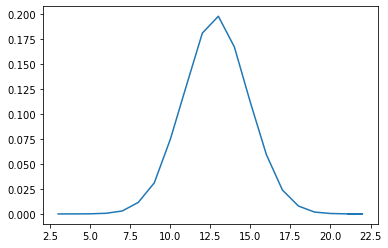

In [110]:
i=3
plt.plot(support[i], vals[i])

### Combining the Supports

In [6]:
flat_support = support.flatten()
flat_vals = vals.flatten()
print(flat_support)
print(flat_vals)

[18.   18.95 19.9  20.85 21.8  22.75 23.7  24.65 25.6  26.55 27.5  28.45
 29.4  30.35 31.3  32.25 33.2  34.15 35.1  36.05 35.61 24.   25.05 26.1
 27.15 28.2  29.25 30.3  31.35 32.4  33.45 34.5  35.55 36.6  37.65 38.7
 39.75 40.8  41.85 42.9  43.95 43.5   3.    3.9   4.8   5.7   6.6   7.5
  8.4   9.3  10.2  11.1  12.   12.9  13.8  14.7  15.6  16.5  17.4  18.3
 19.2  20.1  19.83  3.    4.    5.    6.    7.    8.    9.   10.   11.
 12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   21.09
  1.    1.55  2.1   2.65  3.2   3.75  4.3   4.85  5.4   5.95  6.5   7.05
  7.6   8.15  8.7   9.25  9.8  10.35 10.9  11.45 10.91  2.    2.95  3.9
  4.85  5.8   6.75  7.7   8.65  9.6  10.55 11.5  12.45 13.4  14.35 15.3
 16.25 17.2  18.15 19.1  20.05 19.73]
[0.0000e+00 2.0000e-05 3.2000e-04 1.4500e-03 5.4300e-03 1.6810e-02
 4.0300e-02 8.4960e-02 1.3789e-01 1.7905e-01 1.8564e-01 1.5433e-01
 1.0419e-01 5.4880e-02 2.3430e-02 8.3800e-03 2.3100e-03 4.6000e-04
 1.3000e-04 2.0000e-05 0.0000e+00 0.000

In [7]:
new_support, inverse_index = np.unique(flat_support, return_inverse=True)

In [8]:
print(new_support)

[ 1.    1.55  2.    2.1   2.65  2.95  3.    3.2   3.75  3.9   4.    4.3
  4.8   4.85  5.    5.4   5.7   5.8   5.95  6.    6.5   6.6   6.75  7.
  7.05  7.5   7.6   7.7   8.    8.15  8.4   8.65  8.7   9.    9.25  9.3
  9.6   9.8  10.   10.2  10.35 10.55 10.9  10.91 11.   11.1  11.45 11.5
 12.   12.45 12.9  13.   13.4  13.8  14.   14.35 14.7  15.   15.3  15.6
 16.   16.25 16.5  17.   17.2  17.4  18.   18.15 18.3  18.95 19.   19.1
 19.2  19.73 19.83 19.9  20.   20.05 20.1  20.85 21.   21.09 21.8  22.
 22.75 23.7  24.   24.65 25.05 25.6  26.1  26.55 27.15 27.5  28.2  28.45
 29.25 29.4  30.3  30.35 31.3  31.35 32.25 32.4  33.2  33.45 34.15 34.5
 35.1  35.55 35.61 36.05 36.6  37.65 38.7  39.75 40.8  41.85 42.9  43.5
 43.95]


In [9]:
print(inverse_index)

[ 66  69  75  79  82  84  85  87  89  91  93  95  97  99 100 102 104 106
 108 111 110  86  88  90  92  94  96  98 101 103 105 107 109 112 113 114
 115 116 117 118 120 119   6   9  12  16  21  25  30  35  39  45  48  50
  53  56  59  62  65  68  72  78  74   6  10  14  19  23  28  33  38  44
  48  51  54  57  60  63  66  70  76  80  83  81   0   1   3   4   7   8
  11  13  15  18  20  24  26  29  32  34  37  40  42  46  43   2   5   9
  13  17  22  27  31  36  41  47  49  52  55  58  61  64  67  71  77  73]


In [10]:
print(flat_support[84])

1.0


In [19]:
new_weights = np.zeros((6, len(new_support)))

In [20]:
len(new_support)

121

In [21]:
inverse_index = np.reshape(inverse_index, vals.shape)

In [22]:
print(inverse_index)

[[ 66  69  75  79  82  84  85  87  89  91  93  95  97  99 100 102 104 106
  108 111 110]
 [ 86  88  90  92  94  96  98 101 103 105 107 109 112 113 114 115 116 117
  118 120 119]
 [  6   9  12  16  21  25  30  35  39  45  48  50  53  56  59  62  65  68
   72  78  74]
 [  6  10  14  19  23  28  33  38  44  48  51  54  57  60  63  66  70  76
   80  83  81]
 [  0   1   3   4   7   8  11  13  15  18  20  24  26  29  32  34  37  40
   42  46  43]
 [  2   5   9  13  17  22  27  31  36  41  47  49  52  55  58  61  64  67
   71  77  73]]


In [58]:
inverse_index.shape

(6, 21)

In [59]:
for i in range(inverse_index.shape[0]):
    for j in range(inverse_index.shape[1]):
        print(i,j)
        new_weights[i,j] += flat_vals[inverse_index[i,j]]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20


In [83]:
for i in range(6):
    print(np.sum(new_weights[i,:]))

1.55654
1.36018
1.23509
0.9101699999999999
0.83726
1.16922


In [ ]:
weights = np.reshape()

### Test

In [5]:
n = 6
sorted_distribution = support
weights = vals
expected_demand = np.dot(vals, support)
print(expected_demand)
max_budget = n * expected_demand

16.33501163770181


In [6]:
print(max_budget)

98.01006982621087


In [7]:
np.sum(vals)

1.0

In [8]:
group_demands = np.random.choice(size=n, a=sorted_distribution, p=vals)
print(group_demands)

[18.2 18.2 12.8 15.5 15.5 18.2]


In [9]:
print(waterfilling_waste(group_demands, max_budget))

[18.07002328 18.07002328 12.8        15.5        15.5        18.07002328]


In [10]:
print(greedy(group_demands, max_budget))

[18.2        18.2        12.8        15.5        15.5        17.81006983]


In [11]:
print(constant_threshold(group_demands,max_budget,expected_demand))

[16.33501164 16.33501164 12.8        15.5        15.5        16.33501164]


In [12]:
print(waterfilling_proportional_remaining(group_demands, max_budget))

[16.33501164 16.33501164 12.8        15.5        15.5        18.2       ]


In [13]:
print(waterfilling_dynamic_waste([expected_demand for x in range(n)],group_demands,max_budget))

[16.33501164 16.33501164 12.8        15.5        15.5        18.2       ]


In [14]:
print(waterfilling_dynamic_full_waste([expected_demand for x in range(n)],group_demands,max_budget))

[16.33501164 16.33501164 12.8        15.5        15.5        18.07002328]


In [15]:
print(waterfilling_weights_waste_iid(weights, sorted_distribution, group_demands, max_budget))

[18.2        17.49923638 12.8        15.5        15.5        18.2       ]


In [16]:
print(weights)
print(sorted_distribution)

[1.11022302e-16 3.30000000e-04 5.34000000e-03 4.57400000e-02
 1.82040000e-01 3.34870000e-01 2.89920000e-01 1.17170000e-01
 2.25200000e-02 2.00000000e-03 7.00000000e-05]
[ 2.          4.7         7.4        10.1        12.8        15.5
 18.2        20.9        23.6        26.3        27.20911003]


In [17]:
print(waterfilling_weights_full_waste_iid(weights, sorted_distribution, group_demands, max_budget))

[18.2        17.68727402 12.8        15.5        15.5        18.2       ]


In [18]:
print(max_min_heuristic(group_demands, [med for x in range(n)], [expected_demand for x in range(n)], [var for x in range(n)], max_budget))

[17.64375144 17.36103258 12.20995698 14.78549478 14.78549478 18.2       ]


# Experiments

## Varying Number of Groups

### Look at scaling with n

In [19]:
max_n = 100
num_iterations = 100
print(weights)
print(sorted_distribution)

[1.11022302e-16 3.30000000e-04 5.34000000e-03 4.57400000e-02
 1.82040000e-01 3.34870000e-01 2.89920000e-01 1.17170000e-01
 2.25200000e-02 2.00000000e-03 7.00000000e-05]
[ 2.          4.7         7.4        10.1        12.8        15.5
 18.2        20.9        23.6        26.3        27.20911003]


In [20]:
expected_waterfilling_threshold = np.zeros(max_n+1)
num_iterations = 1000
for i in np.arange(2,max_n+1):
    for _ in range(num_iterations):
        budget = i * 15.
        demands = np.random.choice(size=i, a=support, p=vals)
        opt = waterfilling_waste(demands, budget)
        expected_waterfilling_threshold[i] += (1/num_iterations)*max(opt)
print(expected_waterfilling_threshold)

[ 0.          0.         15.4399     15.83295    16.21575    16.20005
 16.316375   16.43124667 16.4667181  16.44163571 16.38993794 16.43842464
 16.38024703 16.4312625  16.48900263 16.47979367 16.39115313 16.440334
 16.36559916 16.41659973 16.39334469 16.41045486 16.39122123 16.39880485
 16.36791737 16.34519096 16.36412374 16.28306804 16.26309593 16.31866817
 16.3186956  16.33802022 16.31046185 16.29136364 16.28321314 16.24719923
 16.31180118 16.2500695  16.28132426 16.26806528 16.2549722  16.25705354
 16.21147009 16.22924404 16.24356502 16.22230458 16.23864723 16.21975873
 16.24579363 16.26591637 16.26147854 16.23563753 16.24504209 16.21389958
 16.28170858 16.2382219  16.23164056 16.2060867  16.210928   16.19027548
 16.21616936 16.21360254 16.20373759 16.19271301 16.23294216 16.20153124
 16.20346295 16.22477647 16.22241862 16.19468141 16.1789496  16.20548647
 16.19207111 16.18935016 16.18736101 16.22124708 16.20279428 16.20405476
 16.20194694 16.19740672 16.21781688 16.21070947 16.1890

In [21]:
data_dict = {'NumGroups':[], 'Norm':[], 'Dynamic':[],'Weights':[], 'Adapt_Threshold':[], 'Threshold':[], 'Expected_Filling':[], 'Greedy':[], 'Dynamic_Full':[], 'Weights_Full':[], 'Max_Min_Heuristic':[]}
num_iterations = 100
for n in np.arange(2,max_n+1,1):
    n = max(int(n),1)
    group_expected_demands = np.zeros(n) + np.dot(vals, weights)
    group_median_demands = np.zeros(n) + med
    group_variance = np.zeros(n) + var
    budget = n*expected_demand
    print(n)
    for i in range(num_iterations):
        data_dict['NumGroups'].append(n)

        
        group_demands = np.random.choice(size=n, a=support, p=vals)
        opt = waterfilling_waste(group_demands,budget)
        
        weights_sol = waterfilling_weights_waste_iid(weights, sorted_distribution, group_demands, budget)
        weights_full_sol = waterfilling_weights_full_waste_iid(weights, sorted_distribution, group_demands, budget)
        dynamic = waterfilling_dynamic_waste(group_expected_demands,group_demands,budget)
        dynamic_full = waterfilling_dynamic_full_waste(group_expected_demands, group_demands, budget)
        proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
        greed_sol = greedy(group_demands,budget)
        threshold = constant_threshold(group_demands,budget,expected_demand)
        expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
        max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)
        
        data_dict['Norm'].append('L1')
        data_dict['Weights'].append(np.sum(np.absolute(opt - weights_sol)))
        data_dict['Dynamic'].append(np.sum(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.sum(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.sum(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.sum(np.absolute(opt-threshold)))
        data_dict['Dynamic_Full'].append(np.sum(np.absolute(opt-dynamic_full)))
        data_dict['Weights_Full'].append(np.sum(np.absolute(opt-weights_full_sol)))
        data_dict['Expected_Filling'].append(np.sum(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min_Heuristic'].append(np.sum(np.absolute(opt-max_min_heuristic_sol)))
        
        data_dict['NumGroups'].append(n)
        data_dict['Norm'].append('Linf')
        data_dict['Weights'].append(np.max(np.absolute(opt - weights_sol)))
        data_dict['Dynamic'].append(np.max(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.max(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.max(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.max(np.absolute(opt-threshold)))
        data_dict['Dynamic_Full'].append(np.max(np.absolute(opt-dynamic_full)))
        data_dict['Weights_Full'].append(np.max(np.absolute(opt-weights_full_sol)))
        data_dict['Expected_Filling'].append(np.max(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min_Heuristic'].append(np.max(np.absolute(opt-max_min_heuristic_sol)))

2
3
Gave out more than budget
4
5
Gave out more than budget
6
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
7
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
8
Gave out more than budget
9
Gave out more than budget
10
Gave out more than budget
Gave out more than budget
Gave out more than budget
11
Gave out more than budget
Gave out more than budget
Gave out more than budget
Gave out more than budget
12
Gave out more than budget
13
Gave out more than budget
Gave out more than budget
Gave out more than budget
14
Gave out more than budget
15
Gave out more than budget
16
Gave out more than budget
Gave out more than budget
17
18
Gave out more than budget
Gave out more than budget
19
Gave out more than budget
20
21
Gave out more than budget
22
Gave out more than budget
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
4

In [22]:
df = pd.DataFrame(data_dict).melt(id_vars=["NumGroups", 'Norm'])

In [23]:
df.to_csv('scale_with_n.csv')

In [24]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [25]:
df.head

<bound method NDFrame.head of         NumGroups  Norm           variable       value
0               2    L1            Dynamic    0.000000
1               2  Linf            Dynamic    0.000000
2               2    L1            Dynamic    0.000000
3               2  Linf            Dynamic    0.000000
4               2    L1            Dynamic    2.059953
...           ...   ...                ...         ...
178195        100  Linf  Max_Min_Heuristic    2.740507
178196        100    L1  Max_Min_Heuristic  172.139472
178197        100  Linf  Max_Min_Heuristic    2.907921
178198        100    L1  Max_Min_Heuristic  162.433567
178199        100  Linf  Max_Min_Heuristic    3.075543

[178200 rows x 4 columns]>

In [26]:
df[df.variable == 'Weights'].head

<bound method NDFrame.head of        NumGroups  Norm variable     value
19800          2    L1  Weights  0.000000
19801          2  Linf  Weights  0.000000
19802          2    L1  Weights  0.000000
19803          2  Linf  Weights  0.000000
19804          2    L1  Weights  2.655013
...          ...   ...      ...       ...
39595        100  Linf  Weights  3.611243
39596        100    L1  Weights  0.000000
39597        100  Linf  Weights  0.000000
39598        100    L1  Weights  3.439057
39599        100  Linf  Weights  1.572811

[19800 rows x 4 columns]>

<AxesSubplot:title={'center':'Gaussian L1'}, xlabel='NumGroups', ylabel='value'>

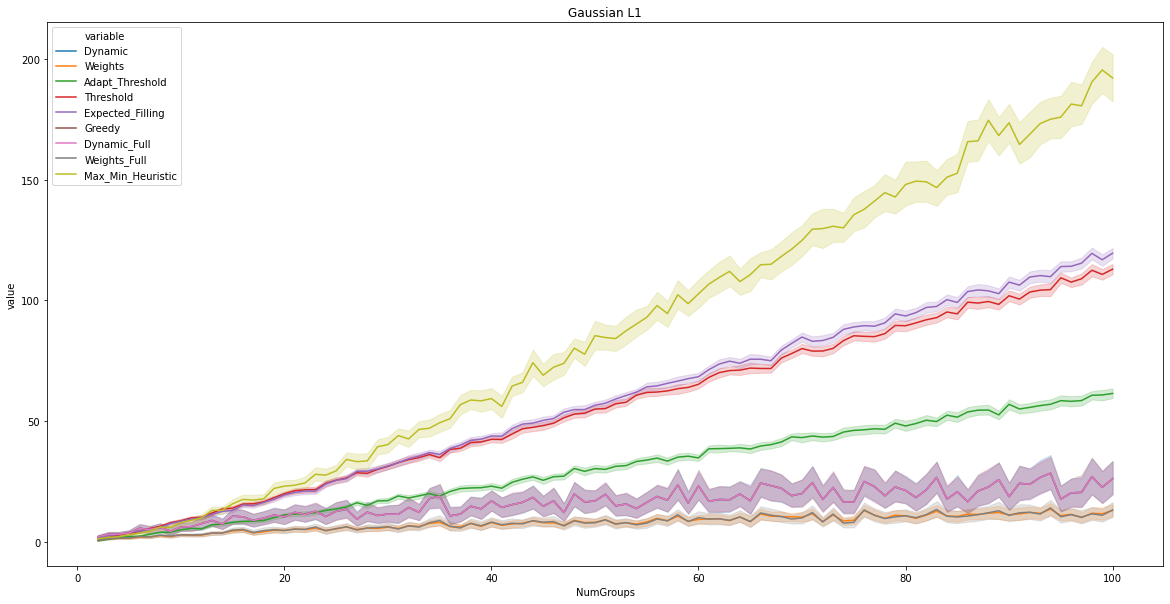

In [27]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Gaussian L1')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'L1'])

<AxesSubplot:title={'center':'Gaussian Linf'}, xlabel='NumGroups', ylabel='value'>

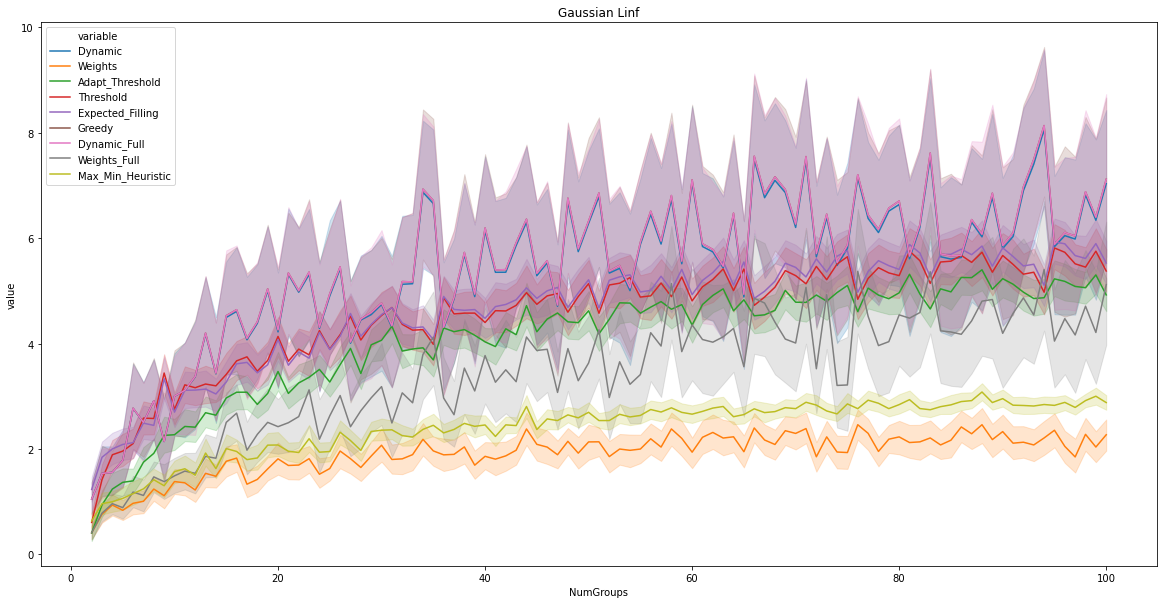

In [28]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Gaussian Linf')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'Linf'])

In [29]:
data_dict = {'Group':[], 'Weights_Full':[], 'Weights_Online':[],'Dynamic_Full':[], 'Dynamic_Online':[], 'True':[], 'Max_Min_Heuristic':[]}
num_iterations = 100


for i in range(num_iterations):
    max_n = 100
    
    weights = np.loadtxt('../../data/gaussian/vals_15_var_3.csv', delimiter=",")
    sorted_support = np.loadtxt('../../data/gaussian/support_15_var_3.csv', delimiter=",")
    expected_demands = [expected_demand for x in range(max_n)]
    median_demands = [med for _ in range(max_n)]
    variance = [var for _ in range(max_n)]
    
    # print(weights)
    # print(sorted_support)
    # print(expected_demands)
    max_budget = max_n*expected_demand
    
    
    
    group_demands = np.random.choice(size=max_n, a=sorted_support, p=weights).astype(np.float)
    print('Demands for experiment:' + str(group_demands))   
    
    dynamic_full = np.copy(expected_demands)
    dynamic_online = np.sort(np.copy(expected_demands))
    
    dynamic_online_budget = max_budget
    weights_online_budget = max_budget

    weights_online_support = np.copy(sorted_support)
    weights_online_vals = np.copy(weights)*max_n
    
    weights_full_support = np.copy(sorted_support)
    weights_full_vals = np.copy(weights)*max_n
    
    max_min_budget = max_budget
    min_fill = 1
    
    for n in range(max_n):
        # Solve for the various waterfilling levels
        data_dict['Group'].append(n)
        
        # Adds on the true waterfilling level
        data_dict['True'].append(max(waterfilling_sorted(np.sort(np.copy(group_demands)), max_budget)))
        
        
        # Dynamic_Full
        
        # Replaces current town's demand with realized demand
        dynamic_full[n] = group_demands[n]
        # Sorts demands
        dynamic_full_sorted = np.sort(np.copy(dynamic_full))
        # Appends maximum allocation based on full demand with full budget
        data_dict['Dynamic_Full'].append(max(waterfilling_sorted(dynamic_full_sorted, max_budget)))
            
            
        # Dynamic_Online
        
        # Removes expected demand for current agent from list
        dynamic_online = delete_sorted(dynamic_online, expected_demands[n])
        
        # adds in the demand for current location
        new_sorted_list, index = insert_sorted(dynamic_online, group_demands[n])
        tmp_sol = waterfilling_sorted(new_sorted_list, dynamic_online_budget)
        data_dict['Dynamic_Online'].append(max(tmp_sol))
        # subtracts off the allocation for the next round
        dynamic_online_budget -= min(tmp_sol[index], dynamic_online_budget, group_demands[n])
        
        
        # Weights_Full
        
        # Updating the weights for the observed group
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(weights_full_support - obs_demand))
        weights_full_vals -= weights
        weights_full_vals[index] += 1
        
        data_dict['Weights_Full'].append(max(waterfilling_sorted_weights(weights_full_support, weights_full_vals, max_budget)))
        
        
        # Weights_Online
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(weights_online_support - obs_demand))
        weights_online_vals -= weights
        weights_online_vals[index] += 1        
        
        
        tmp_sol = waterfilling_sorted_weights(weights_online_support, weights_online_vals, weights_online_budget)
        weights_online_budget -= min(obs_demand, weights_online_budget, tmp_sol[index])
        
        weights_online_vals[index] -= 1
        data_dict['Weights_Online'].append(max(tmp_sol))
        
        # Max_Min
        
        if n == max_n - 1:
            data_dict['Max_Min_Heuristic'].append(min(max_min_budget, group_demands[n]))
        else:
            delta = (median_demands[n] - median_demands[n+1]) / ((1/2)* (median_demands[n] + median_demands[n+1]))
            budget_portion = max_min_budget * (expected_demands[n] + expected_demands[n+1]) / np.sum(expected_demands[n:])
            heuristic_threshold = budget_portion * (group_demands[n] / (group_demands[n] + median_demands[n+1] + delta * np.sqrt(variance[n+1])))
            allocation = min(heuristic_threshold, min_fill*group_demands[n], max_min_budget)
            data_dict['Max_Min_Heuristic'].append(heuristic_threshold)
            
            if allocation / group_demands[n] <= min_fill:
                min_fill = allocation / group_demands[n]
            max_min_budget -= allocation


Demands for experiment:[12.8 15.5 15.5 15.5 12.8 15.5 15.5 18.2 18.2 15.5 20.9 18.2 15.5 18.2
 12.8 15.5 15.5 18.2 18.2 12.8 15.5  7.4 10.1 12.8 20.9 10.1 18.2 18.2
 15.5 20.9 18.2 12.8 15.5 15.5 12.8 12.8 12.8 18.2 15.5  7.4 20.9 18.2
 18.2 18.2 18.2 20.9 20.9 18.2 15.5 15.5 15.5 15.5 18.2 15.5 15.5 23.6
 18.2 12.8 15.5 15.5 15.5 20.9 18.2 18.2 15.5 20.9 18.2 18.2 18.2 15.5
 12.8 20.9 18.2 18.2 10.1 20.9 15.5 15.5 18.2 15.5 15.5 12.8 15.5 15.5
 10.1 18.2 20.9 18.2 20.9 10.1 12.8 15.5 15.5 12.8 15.5 18.2 18.2  7.4
 12.8 15.5]
Demands for experiment:[15.5 15.5 15.5 18.2 20.9 15.5 18.2 18.2 18.2 18.2 18.2 18.2 18.2 15.5
 18.2 15.5 10.1 18.2 10.1 20.9 23.6 15.5 18.2 18.2 15.5 20.9 18.2 18.2
 20.9 12.8 10.1 12.8 15.5 18.2 15.5 18.2 15.5 15.5 18.2 15.5 15.5 18.2
 15.5 15.5 15.5 15.5 12.8  7.4 20.9 12.8 18.2 18.2 15.5 12.8 18.2 20.9
 12.8 15.5 18.2 18.2 15.5 18.2 18.2 20.9 15.5 12.8 20.9 15.5 12.8 15.5
 12.8 15.5 12.8 18.2 20.9 10.1 20.9 15.5 18.2 23.6 18.2 18.2 18.2 15.5
 15.5 15.5 18.2 12.

Demands for experiment:[12.8 15.5 12.8 18.2 12.8 20.9 15.5 15.5 10.1 20.9 18.2 10.1 15.5 15.5
 18.2 12.8 15.5 18.2 18.2 18.2 23.6 20.9 20.9 15.5 18.2 15.5 18.2 15.5
 12.8 15.5 10.1 18.2 23.6 18.2 15.5 15.5 15.5 18.2 18.2 20.9 18.2 18.2
 15.5 18.2 12.8 15.5 10.1 18.2 18.2 18.2 15.5 20.9 18.2 12.8 15.5 18.2
 15.5 23.6 15.5 12.8 20.9 12.8 12.8 15.5 18.2 15.5 20.9 18.2 15.5 18.2
 18.2 18.2 10.1 18.2 15.5 15.5 15.5 15.5 10.1 18.2 18.2 20.9 12.8 15.5
 15.5 15.5 18.2 15.5 12.8 20.9 15.5 15.5 18.2 15.5 18.2 12.8 12.8 15.5
 18.2 15.5]
Demands for experiment:[15.5 15.5 15.5 18.2 15.5 12.8 15.5 18.2 18.2 23.6 18.2 18.2 12.8 12.8
 15.5 18.2 15.5 15.5 12.8 15.5 15.5 18.2 15.5 15.5 23.6 20.9 15.5 15.5
 18.2 15.5 20.9 15.5 18.2 18.2 18.2 18.2 18.2 12.8 15.5 12.8 15.5 12.8
 18.2 12.8 18.2 12.8 15.5 20.9 18.2  7.4 18.2 20.9 18.2 15.5 20.9 18.2
 15.5 15.5 18.2 18.2 18.2 15.5 15.5 18.2 20.9 18.2 15.5 15.5 12.8 12.8
 18.2 15.5 18.2 20.9 18.2 12.8 23.6 15.5 18.2 12.8 18.2 10.1 20.9 12.8
 18.2 18.2 15.5 15.

 18.2 15.5]
Demands for experiment:[12.8 10.1 18.2 15.5 15.5 18.2 15.5 12.8 18.2 15.5 18.2 12.8 20.9 15.5
 18.2 15.5 18.2 18.2 18.2 18.2 18.2 15.5 15.5 15.5 18.2 15.5 15.5 18.2
 10.1 18.2 15.5 18.2 15.5 15.5 18.2 15.5 12.8 18.2 10.1 15.5 18.2 15.5
 18.2 10.1 12.8 18.2 18.2 15.5 15.5 20.9 18.2 15.5 12.8 15.5 15.5 15.5
 15.5 18.2 15.5 20.9 12.8 18.2 18.2 20.9 20.9 15.5 18.2 15.5 18.2 15.5
 18.2 10.1 20.9 18.2 18.2 15.5 18.2 18.2 12.8 18.2 15.5  7.4 18.2 15.5
 18.2 15.5  7.4 10.1 18.2 15.5 12.8 12.8 18.2 15.5 15.5 15.5 15.5 18.2
 12.8 20.9]
Demands for experiment:[18.2 12.8 12.8 18.2 15.5 12.8 12.8 18.2 18.2 18.2 18.2 15.5 15.5 10.1
 20.9 12.8 12.8 12.8 15.5 12.8 15.5 15.5 18.2 18.2 15.5 15.5 15.5 23.6
 20.9 15.5 18.2 18.2 23.6 15.5 15.5 12.8 12.8 12.8 18.2 23.6 15.5 12.8
 18.2 15.5 15.5 20.9 15.5 15.5 18.2 18.2 15.5 12.8 20.9 15.5 12.8 15.5
 18.2 23.6 18.2 18.2 12.8 18.2 18.2 18.2 18.2 15.5 15.5 18.2 15.5 12.8
 12.8 15.5 20.9 15.5 18.2 12.8 15.5 12.8 12.8 18.2 10.1 12.8 18.2 20.9
 15.5 1

Demands for experiment:[23.6 15.5 15.5 15.5 18.2 12.8 15.5 12.8 10.1 18.2 10.1 15.5 12.8 15.5
 12.8 15.5 18.2 18.2 15.5 12.8 20.9 18.2 12.8 15.5 12.8 18.2 15.5 18.2
 18.2 15.5 15.5 15.5 15.5 15.5 12.8 12.8 15.5 15.5 18.2 15.5 18.2 20.9
 20.9 18.2 18.2 15.5 18.2 18.2 15.5 15.5 12.8 10.1 20.9 15.5 15.5 20.9
 18.2 18.2 18.2 10.1 15.5 18.2 18.2 15.5 12.8 18.2 15.5 15.5 10.1 15.5
 15.5 20.9 18.2 15.5 15.5 15.5 15.5 15.5 20.9 18.2 20.9 20.9 18.2 15.5
 12.8 15.5 15.5 15.5 20.9 18.2 18.2 18.2 20.9 12.8 18.2 15.5 18.2 18.2
 18.2 12.8]
Demands for experiment:[12.8 12.8 15.5 18.2 18.2 15.5 15.5 15.5 18.2 15.5 20.9 12.8 15.5 12.8
 12.8 18.2 18.2 20.9 15.5 18.2 10.1 15.5 23.6 15.5 18.2 12.8 18.2 12.8
 12.8 15.5 15.5 18.2 18.2 18.2 20.9 20.9 20.9 15.5 18.2 23.6 10.1 12.8
 12.8 15.5 15.5 12.8 18.2 15.5 18.2 18.2 15.5 15.5 18.2 18.2 15.5 15.5
 12.8 12.8 15.5 18.2 12.8 15.5 15.5 20.9 20.9 20.9 12.8 18.2 15.5 18.2
 10.1 18.2 12.8 15.5 18.2 18.2 15.5 10.1 18.2 15.5 20.9 15.5 20.9 15.5
 15.5 18.2 12.8 15.

 15.5 18.2]
Demands for experiment:[18.2 15.5 18.2 18.2 15.5 12.8 12.8 15.5 15.5 18.2 12.8 18.2 15.5 12.8
 18.2 12.8 18.2 23.6 15.5 12.8 20.9 15.5 12.8 20.9 15.5 18.2 15.5 20.9
 20.9 15.5 15.5 15.5 18.2 18.2 15.5 15.5 18.2 12.8 12.8 20.9 15.5 20.9
 12.8 18.2 18.2 10.1 15.5 15.5 18.2 12.8 15.5 15.5 15.5 18.2 18.2 15.5
 15.5 12.8 15.5 15.5 18.2 15.5 15.5 15.5 23.6 15.5 12.8 18.2 12.8 12.8
 18.2 15.5 18.2 18.2 20.9 15.5 15.5 12.8 12.8 15.5 18.2 15.5 18.2 20.9
 20.9 18.2 12.8 12.8 12.8 15.5 15.5 15.5 15.5 10.1 20.9 18.2 20.9 10.1
 15.5 18.2]
Demands for experiment:[15.5 18.2 18.2 15.5 18.2 12.8 15.5 15.5 18.2 12.8 15.5 12.8 15.5 18.2
 20.9 15.5 15.5 15.5 12.8 15.5 18.2 20.9 15.5 15.5 15.5 18.2 15.5 20.9
 12.8 18.2 18.2 18.2 12.8 15.5 20.9 12.8 18.2 18.2 15.5 18.2 18.2 18.2
 12.8 12.8 20.9 15.5 15.5 20.9 23.6 18.2 18.2 18.2 20.9 15.5 12.8 23.6
 15.5 10.1 12.8 12.8 18.2 20.9 15.5 15.5 12.8 18.2 12.8 12.8 23.6 18.2
 15.5 18.2 18.2 18.2 18.2 15.5 12.8 15.5 15.5 12.8 18.2 20.9 15.5 15.5
 15.5 1

Demands for experiment:[20.9 18.2 20.9 15.5 18.2 12.8 20.9 15.5 18.2 15.5 10.1 15.5 15.5 12.8
 12.8 12.8 12.8 12.8 15.5 15.5 23.6 18.2 20.9 15.5 15.5 15.5 20.9 18.2
 15.5 20.9 18.2 15.5 18.2 12.8 18.2 12.8 12.8 18.2 18.2 10.1 15.5 18.2
 12.8 20.9 20.9 18.2 15.5 18.2 20.9 18.2 12.8 15.5 20.9 15.5 15.5 12.8
 18.2 20.9 15.5 18.2 18.2 12.8 15.5 20.9 20.9 12.8 18.2 12.8 12.8 12.8
 15.5 18.2 10.1 20.9 12.8 12.8 20.9 15.5 15.5 18.2 15.5 15.5 15.5 18.2
 18.2 15.5 18.2 10.1 12.8 12.8 15.5 18.2 12.8 18.2 15.5 18.2 18.2 20.9
 12.8 18.2]
Demands for experiment:[20.9 18.2 15.5 20.9 15.5 20.9 12.8 12.8 12.8 18.2 15.5 12.8 18.2 12.8
 20.9 12.8 15.5 12.8 18.2 18.2 15.5 15.5 12.8 12.8 15.5 18.2 18.2 15.5
 18.2 12.8 20.9 20.9 18.2 15.5 18.2 20.9 15.5 15.5 20.9 15.5 18.2 12.8
 18.2 15.5 15.5 20.9 15.5 18.2 18.2 15.5 20.9 18.2 15.5 15.5 20.9 20.9
 20.9 20.9 10.1 12.8 15.5 18.2 18.2 15.5 18.2 18.2 18.2 18.2 12.8 15.5
 15.5 12.8 10.1 15.5 12.8 12.8 18.2 18.2 12.8 12.8 10.1 23.6 15.5 18.2
 15.5 18.2 20.9 18.

In [30]:
np.std(data_dict['True'])

2.1809638304022085

In [31]:
df = pd.DataFrame(data_dict).melt(id_vars="Group")

In [32]:
df.to_csv('comparison_of_waterfilling_levels.csv')

Text(0.5, 0, 'Estimated Level')

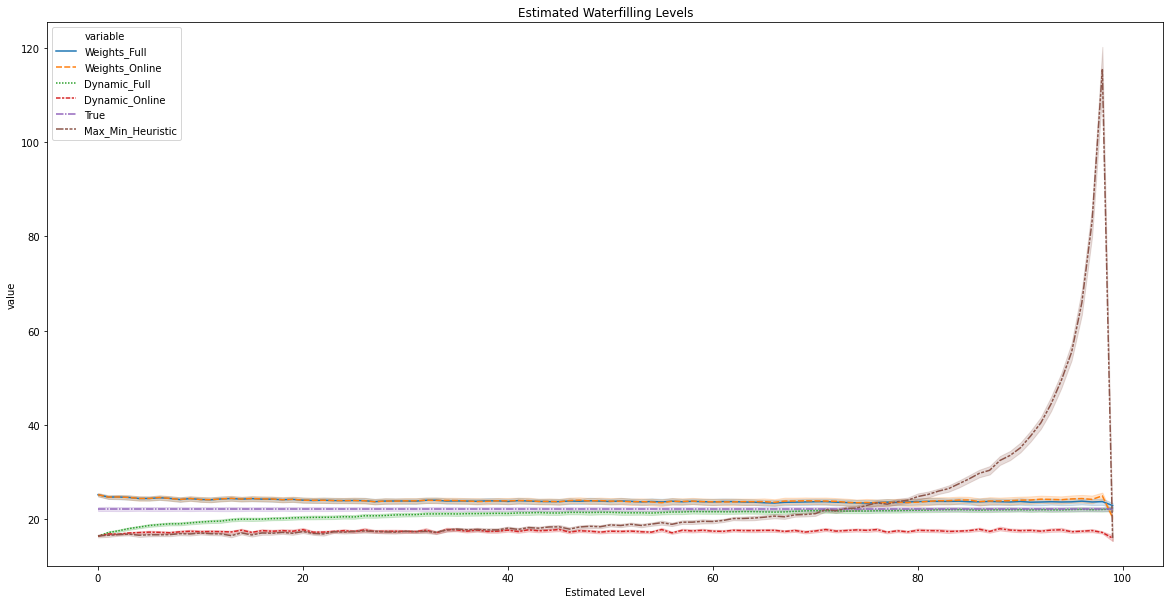

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', style='variable', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')

### Calculating Fairness Statistics


In [34]:
num_iterations = 1000
weights = np.loadtxt('../../data/gaussian/vals_15_var_3.csv', delimiter=",")
sorted_distribution = np.loadtxt('../../data/gaussian/support_15_var_3.csv', delimiter=",")
expected_demand = np.dot(weights, sorted_distribution)
n=100

In [35]:
group = np.arange(n)
group_expected_demands = np.zeros(n) + expected_demand
budget = expected_demand*n
score_weights_online = np.zeros((n,num_iterations))
score_weights_full = np.zeros((n,num_iterations))
score_dynamic_online = np.zeros((n,num_iterations))
score_dynamic_full = np.zeros((n,num_iterations))
score_greedy = np.zeros((n,num_iterations))
score_adapt_threshold = np.zeros((n,num_iterations))
score_fixed_threshold = np.zeros((n,num_iterations))
score_expect_threshold = np.zeros((n, num_iterations))
score_max_min = np.zeros((n, num_iterations))

# 8 different algorithms
env = np.zeros((9,num_iterations))
po = np.zeros((9,num_iterations))
prop = np.zeros((9,num_iterations))
linf = np.zeros((9,num_iterations))
max_min = np.zeros((9, num_iterations))
for i in range(num_iterations):
    budget = n*np.dot(weights, sorted_distribution)

        
    group_demands = np.random.choice(size=n, a=sorted_distribution, p=weights)
    group_median_demands = np.zeros(n) + med
    group_variance = np.zeros(n) + var
    
    opt = waterfilling_waste(group_demands,budget)

    weights_sol = waterfilling_weights_waste_iid(weights, sorted_distribution, group_demands, budget)
    weights_full_sol = waterfilling_weights_full_waste_iid(weights, sorted_distribution, group_demands, budget)
    dynamic = waterfilling_dynamic_waste(group_expected_demands,group_demands,budget)
    dynamic_full = waterfilling_dynamic_full_waste(group_expected_demands, group_demands, budget)
    proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
    greedy_sol = greedy(group_demands,budget)
    threshold = constant_threshold(group_demands,budget,expected_demand)
    expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
    max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)

    # comparing weights_online
    
    score_weights_online[:,i] = opt - weights_sol
    env[0,i] = max(0,np.amax(envy_utility(weights_sol,group_demands)))
    po[0,i] = excess(weights_sol,budget)
    prop[0,i] = np.amax(proportionality_utility(weights_sol,group_demands,budget))
    max_min[0,i] = np.min(utility_ratio(weights_sol, group_demands, budget))
    linf[0,i] = np.amax(score_weights_online[:,i])
    
    
    # comparing weights_full
    
    score_weights_full[:,i] = opt - weights_full_sol
    env[1,i] = max(0,np.amax(envy_utility(weights_full_sol,group_demands)))
    po[1,i] = excess(weights_full_sol,budget)
    prop[1,i] = np.amax(proportionality_utility(weights_full_sol,group_demands,budget))
    max_min[1,i] = np.min(utility_ratio(weights_full_sol, group_demands, budget))
    linf[1,i] = np.amax(score_weights_full[:,i])
    
    
    # comparing dynamic_online
    
    score_dynamic_online[:,i] = opt - dynamic
    env[2,i] = max(0,np.amax(envy_utility(dynamic,group_demands)))
    po[2,i] = excess(dynamic,budget)
    prop[2,i] = np.amax(proportionality_utility(dynamic,group_demands,budget))
    max_min[2,i] = np.min(utility_ratio(dynamic, group_demands, budget))
    linf[2,i] = np.amax(score_dynamic_online[:,i])
    
    
    # comparing dynamic_full
    
    score_dynamic_full[:,i] = opt - dynamic_full
    env[3,i] = max(0,np.amax(envy_utility(dynamic_full,group_demands)))
    po[3,i] = excess(dynamic_full,budget)
    prop[3,i] = np.amax(proportionality_utility(dynamic_full,group_demands,budget))
    max_min[3,i] = np.min(utility_ratio(dynamic_full, group_demands, budget))
    linf[3,i] = np.amax(score_dynamic_full[:,i])
    
    
    # comparing greedy
    
    score_greedy[:,i] = opt - greedy_sol
    env[4,i] = max(0,np.amax(envy_utility(greedy_sol,group_demands)))
    po[4,i] = excess(greedy_sol,budget)
    prop[4,i] = np.amax(proportionality_utility(greedy_sol,group_demands,budget))
    max_min[4,i] = np.min(utility_ratio(greedy_sol, group_demands, budget))
    linf[4,i] = np.amax(score_greedy[:,i])
    
    # comparing fixed_threshold
    
    score_fixed_threshold[:,i] = opt - threshold
    env[5,i] = max(0,np.amax(envy_utility(threshold,group_demands)))
    po[5,i] = excess(threshold,budget)
    prop[5,i] = np.amax(proportionality_utility(threshold,group_demands,budget))
    max_min[5,i] = np.min(utility_ratio(threshold, group_demands, budget))
    linf[5,i] = np.amax(score_fixed_threshold[:,i])    
    
    
    # comparing adaptive_threshold
    
    score_adapt_threshold[:,i] = opt - proportional_threshold
    env[6,i] = max(0,np.amax(envy_utility(proportional_threshold,group_demands)))
    po[6,i] = excess(proportional_threshold,budget)
    prop[6,i] = np.amax(proportionality_utility(proportional_threshold,group_demands,budget))
    max_min[6,i] = np.min(utility_ratio(proportional_threshold, group_demands, budget))
    linf[6,i] = np.amax(score_adapt_threshold[:,i])    

    # comparing expected_threshold
    
    score_expect_threshold[:,i] = opt - expect_threshold
    env[7,i] = max(0,np.amax(envy_utility(expect_threshold,group_demands)))
    po[7,i] = excess(expect_threshold,budget)
    prop[7,i] = np.amax(proportionality_utility(expect_threshold,group_demands,budget))
    max_min[7,i] = np.min(utility_ratio(expect_threshold, group_demands, budget))
    linf[7,i] = np.amax(score_expect_threshold[:,i])    
    

    # comparing max_min_heurstic
    
    score_max_min[:,i] = opt - max_min_heuristic_sol
    env[8,i] = max(0,np.amax(envy_utility(max_min_heuristic_sol,group_demands)))
    po[8,i] = excess(max_min_heuristic_sol,budget)
    prop[8,i] = np.amax(proportionality_utility(max_min_heuristic_sol,group_demands,budget))
    max_min[8,i] = np.min(utility_ratio(max_min_heuristic_sol, group_demands, budget))
    linf[8,i] = np.amax(score_max_min[:,i]) 

In [36]:
score_weights_online = np.average(score_weights_online, axis=1)
score_weights_full = np.average(score_weights_full, axis=1)
score_dynamic_online = np.average(score_dynamic_online, axis=1)
score_dynamic_full = np.average(score_dynamic_full, axis=1)
score_greedy = np.average(score_greedy, axis=1)
score_adapt_threshold = np.average(score_adapt_threshold, axis=1)
score_fixed_threshold = np.average(score_fixed_threshold, axis=1)
score_expect_threshold = np.average(score_expect_threshold, axis=1)
score_max_min = np.average(score_max_min, axis=1)

env = np.average(env,axis=1)
po = np.average(po,axis=1)
prop = np.average(prop,axis=1)
linf = np.average(linf,axis=1)
max_min = np.average(max_min, axis=1)

In [37]:
print(env)

[0.11462819 0.26689685 0.20062107 0.18754871 0.40625982 0.
 0.22031901 0.         0.13611282]


In [38]:
print(po)

[0.16170566 0.14853262 0.23667252 0.25011346 0.13013116 1.26463896
 0.71170336 1.3303196  2.05410052]


In [39]:
print(prop)

[1.20298229e-02 2.15823827e-01 6.57474075e-16 5.47206071e-02
 3.82059203e-01 0.00000000e+00 2.66453526e-18 8.35395770e-03
 1.36112816e-01]


In [40]:
print(max_min)

[0.862746   0.71246547 0.7878988  0.77451005 0.59361822 0.68686057
 0.71655309 0.68046746 0.86388718]


In [41]:
print(linf)

[2.05111634 4.69457091 3.53883289 3.71818429 6.80602498 5.54126608
 5.04185842 5.69330811 2.88622679]


In [42]:
print('weights_online, weights_full, dynamic_online, dynamic_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min')
print('envy:')
print(env)
print('po')
print(po)
print('prop')
print(prop)
print('sum')
print(env+po+prop)
print('max_min')
print(max_min)
print('linf')
print(linf)

weights_online, weights_full, dynamic_online, dynamic_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min
envy:
[0.11462819 0.26689685 0.20062107 0.18754871 0.40625982 0.
 0.22031901 0.         0.13611282]
po
[0.16170566 0.14853262 0.23667252 0.25011346 0.13013116 1.26463896
 0.71170336 1.3303196  2.05410052]
prop
[1.20298229e-02 2.15823827e-01 6.57474075e-16 5.47206071e-02
 3.82059203e-01 0.00000000e+00 2.66453526e-18 8.35395770e-03
 1.36112816e-01]
sum
[0.28836368 0.63125329 0.43729359 0.49238277 0.91845018 1.26463896
 0.93202238 1.33867355 2.32632615]
max_min
[0.862746   0.71246547 0.7878988  0.77451005 0.59361822 0.68686057
 0.71655309 0.68046746 0.86388718]
linf
[2.05111634 4.69457091 3.53883289 3.71818429 6.80602498 5.54126608
 5.04185842 5.69330811 2.88622679]


In [43]:
data_dict = {'Group':group, 'Weights_Online': score_weights_online, 'Weights_Full':score_weights_full, 'Dynamic_Online':score_dynamic_online, 'Dynamic_Full':score_dynamic_full, 'Greedy':score_greedy, 'Adapt_Threshold': score_adapt_threshold, 'Fixed_Threshold': score_fixed_threshold, 'Expect_Threshold':score_expect_threshold, 'Max_Min_Heuristic':score_max_min}
df_uniform = pd.DataFrame(data_dict).melt(id_vars="Group")

In [44]:
df_uniform.columns

Index(['Group', 'variable', 'value'], dtype='object')

In [45]:
df_uniform.to_csv('fairness_group_by_group.csv')

Text(0.5, 0, 'Estimated Level')

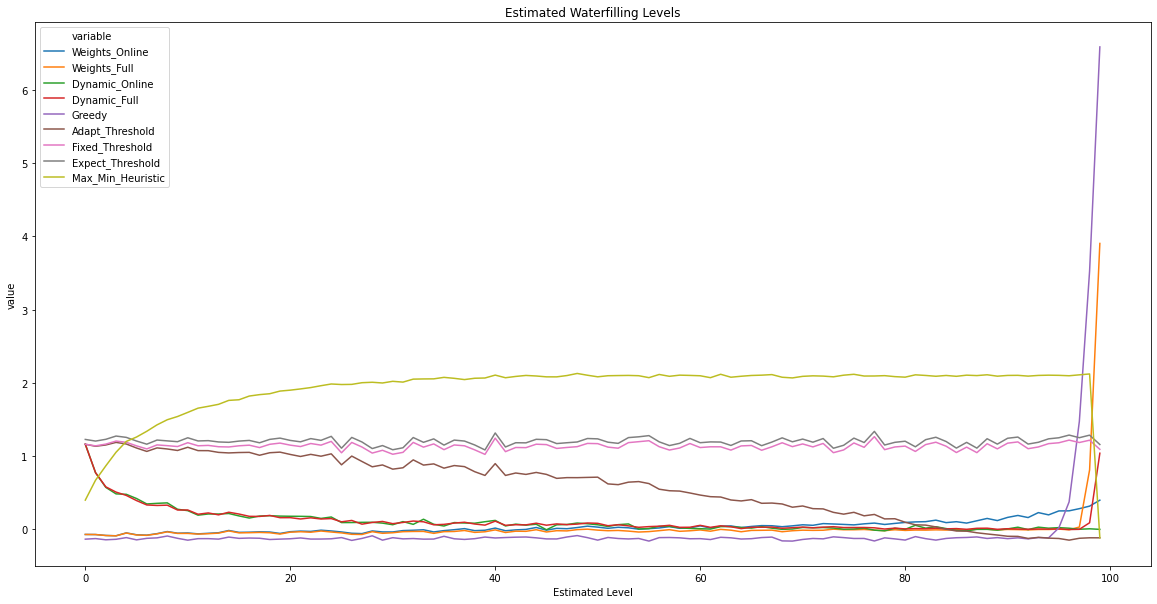

In [46]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', hue = 'variable', data=df_uniform)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')